In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from preprocessing import preprocess_data_exo2
from NLP_on_genres import transform_genres, is_there_nan_values

In [2]:
df = pd.read_csv('../data/Spotify_exo2.csv')
df.head()

features =  ['mode', 'acousticness', 'danceability', 'duration_ms', 'energy' ,'instrumentalness',
             'liveness', 'loudness', 'speechiness', 'tempo', 'valence', 'key']

df_normal = df.drop('genres', axis=1)
print(f"Shape dataframe original :{df_normal.shape}")

df_normal_standardized = preprocess_data_exo2(df=df_normal, features_columns=features, z_score=True, standardize=True)
print(f"Shape dataframe original standardized without outliers :{df_normal_standardized.shape}")

df_genres = transform_genres(df=df, remove_genres_column=True)
print(f"Shape dataframe genres columns encoded:{df_genres.shape}")

df_genres_standardized = preprocess_data_exo2(df=df, features_columns=features, z_score=True, standardize=True)
df_genres_standardized = transform_genres(df_genres_standardized, remove_genres_column=True)
print(f"Shape dataframe genres columns encoded standardized without outliers:{df_genres_standardized.shape}")

Shape dataframe original :(2973, 13)
------------------------------------------
            Preprocessing data exo2           
------------------------------------------
Get dataset
------------------------------------------
Extract inputs ...
Shape of the data to process : (2973, 13)
Remove outliers with zscore ...
Center and reduce inputs ...
------------------------------------------
Data shape after preprocessing : (2885, 13)
Return dataset(s) ...
Preprocessing finished
------------------------------------------
Shape dataframe original standardized without outliers :(2885, 13)
Shape dataframe genres columns encoded:(2972, 1645)
------------------------------------------
            Preprocessing data exo2           
------------------------------------------
Get dataset
------------------------------------------
Extract inputs ...
Shape of the data to process : (2973, 14)
Remove outliers with zscore ...
Center and reduce inputs ...
------------------------------------------
Data s

In [3]:
from sklearn import model_selection
from sklearn.ensemble import RandomForestRegressor

def compute_rmse(df, target, depth_list, scoring='neg_root_mean_squared_error'):
    X = df.drop(target, axis=1)
    y = df[target]

    scores = np.zeros(len(depth_list))

    kfold = model_selection.KFold(n_splits=3, random_state=7)

    for i, depth in enumerate(depth_list):
        regressor = RandomForestRegressor(random_state=0, max_depth=depth)
        scores[i] = -np.mean(model_selection.cross_val_score(regressor, X, y, cv=kfold, scoring=scoring))

    return scores


def plot_ytrue_y_pred(y_true, y_pred, title):
    plt.figure(figsize=(15, 5))
    plt.plot(np.array(y_true), label='True value')
    plt.plot(y_pred, label='Predicted value')
    plt.suptitle(title)
    plt.legend()
    plt.grid()
    plt.show()

def plot_rmse_vs_depth(depth_list, rmse_list, title):
    figure = plt.figure(figsize=(5,5))
    plt.plot(depth_list, rmse_list)
    plt.xlabel('Depth')
    plt.ylabel('RMSE')
    plt.suptitle(title)
    plt.grid()
    plt.show()

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

X = df_normal.drop('popularity', axis=1)
y = df_normal['popularity']

regressor = RandomForestRegressor(random_state=0)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)
print(f'RMSE :  {mean_squared_error(y_test, y_pred, squared=False)}')

RMSE :  10.857718869870874


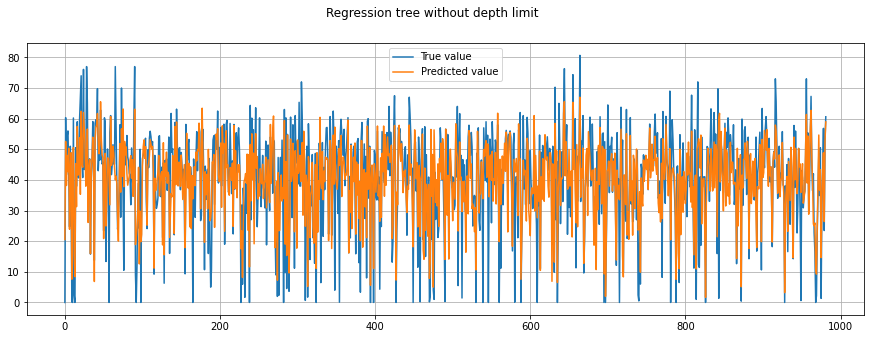

In [5]:
plot_ytrue_y_pred(y_test, y_pred, 'Regression tree without depth limit')

RMSE :  4.264013904543887


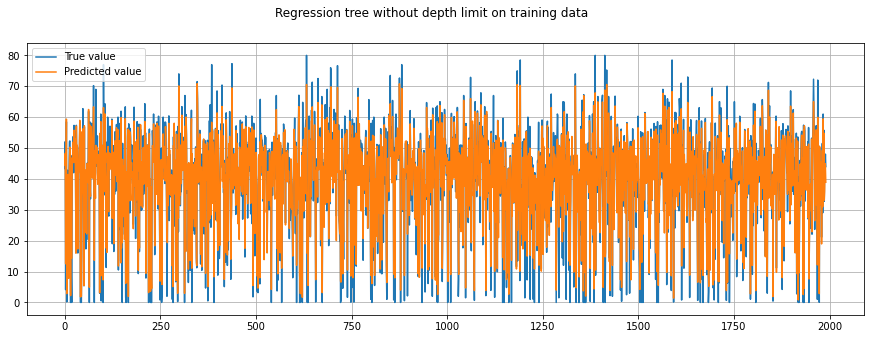

In [6]:
y_train_prediction = regressor.predict(X_train)
print(f'RMSE :  {mean_squared_error(y_train, y_train_prediction, squared=False)}')
plot_ytrue_y_pred(y_train, y_train_prediction, 'Regression tree without depth limit on training data')

### Normal df

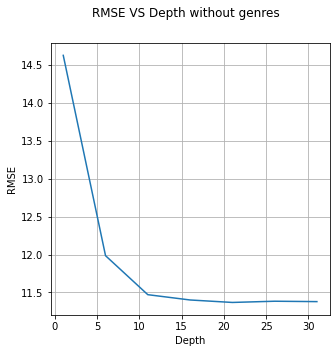

In [7]:
depth_list = [x for x in range(1, 35, 5)]
rmse_normal = compute_rmse(df_normal, "popularity", depth_list, scoring='neg_root_mean_squared_error')
plot_rmse_vs_depth(depth_list, rmse_normal, 'RMSE VS Depth without genres')

### Normal df standardized

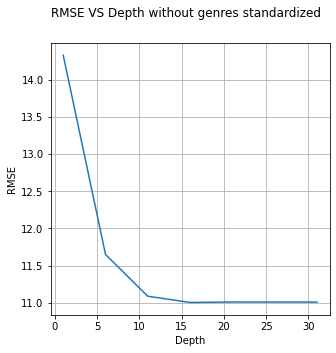

In [8]:
rmse_normal_standardized = compute_rmse(df_normal_standardized, "popularity", depth_list, scoring='neg_root_mean_squared_error')
plot_rmse_vs_depth(depth_list, rmse_normal_standardized, 'RMSE VS Depth without genres standardized')

### df with genres

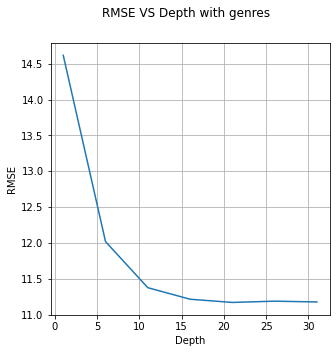

In [9]:
rmse_genres= compute_rmse(df_genres, "popularity", depth_list, scoring='neg_root_mean_squared_error')
plot_rmse_vs_depth(depth_list, rmse_genres, 'RMSE VS Depth with genres')

### df with genres standardized

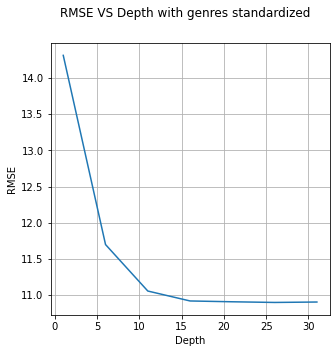

In [10]:
rmse_genres_standardized = compute_rmse(df_genres_standardized, "popularity", depth_list, scoring='neg_root_mean_squared_error')
plot_rmse_vs_depth(depth_list, rmse_genres_standardized, 'RMSE VS Depth with genres standardized')


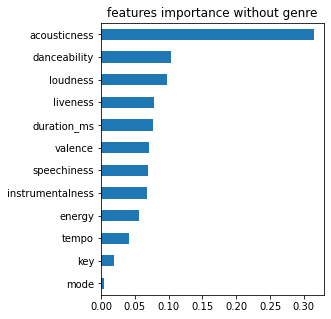

In [20]:
coef = pd.Series(regressor.feature_importances_, index =X_train.columns)

imp_coef = coef.sort_values()

matplotlib.rcParams['figure.figsize'] = (4.0, 5.0)
imp_coef.plot(kind = "barh")
plt.title("features importance without genre")
plt.show()

In [21]:
regressor2 = RandomForestRegressor()
target = 'popularity'
X = df_genres_standardized.drop(target, axis=1)
y = df_genres_standardized[target]

regressor2.fit(X, y)

RandomForestRegressor()

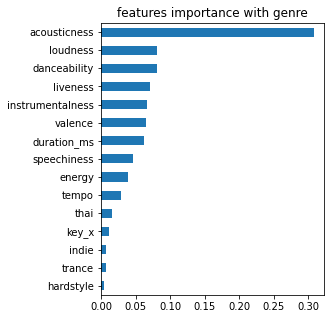

In [24]:
coef = pd.Series(regressor2.feature_importances_, index =X.columns)

imp_coef = coef.sort_values().tail(15)

matplotlib.rcParams['figure.figsize'] = (4.0, 5.0)
imp_coef.plot(kind = "barh")
plt.title("features importance with genre")
plt.show()